# King Country House Sales Prediction
## Project by Maddy

## INTRODUCTION:

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

## PROBLEM STATEMENT:

In this dataset we have to predict the sales price of houses in King County, Seattle. It includes homes sold between May 2014 and May 2015.

Before doing anything we should first know about the dataset what it contains what are its features and what is the structure of data.

#### ATTRIBUTE INFO: 
1. id :- It is the unique numeric number assigned to each house being sold. 
2. date :- It is the date on which the house was sold out. 
3. price:- It is the price of house which we have to predict so this is our target variable and apart from it are our features. 
4. bedrooms :- It determines number of bedrooms in a house. 
5. bathrooms :- It determines number of bathrooms in a bedroom of a house. 
6. sqft_living :- It is the measurement variable which determines the measurement of house in square foot. 
7. sqft_lot : It is also the measurement variable which determines square foot of the lot. 
8. floors: It determines total floors means levels of house. 
9. waterfront : This feature determines whether a house has a view to waterfront 0 means no 1 means yes. 
10. view : This feature determines whether a house has been viewed or not 0 means no 1 means yes. 
11. condition : It determines the overall condition of a house on a scale of 1 to 5. 
12. grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11. 
13. sqft_above : It determines square footage of house apart from basement. 
14. sqft_basement : It determines square footage of the basement of the house. 
15. yr_built : It detrmines the date of building of the house. 
16. yr_renovated : It detrmines year of renovation of house. 
17. zipcode : It determines the zipcode of the location of the house. 
18. lat : It determines the latitude of the location of the house. 
19. long : It determines the longitude of the location of the house. 
20. sqft_living15 : Living room area in 2015(implies-- some renovations) 
21. sqft_lot15 : lotSize area in 2015(im


By using machine learning, we will developed an alogorithm to find the house sales in King Country.  Using the dataset (kc_house_data.csv) of nearly 21,613 records and  by multi-liner regression algorithm, we are going to find the house sales prediction.  In this project, we will build and deploy the following machine learning algorithm:

* Multi-Linear Regression Algorithm

Furthermore, using metrics suchs as precision, recall, and F1-scores, we will investigate why the regression accuracy for these algorithm can be misleading.

In addition, we will explore the use of data visualization techniques common in data science, such as parameter histograms and correlation matrices, to gain a better understanding of the underlying distribution of data in our data set. Let's get started!

### 1. IMPORTING NECESSARY LIBRARIES

To start, let's print out the version numbers of all the libraries we will be using in this project. This serves two purposes - it ensures we have installed the libraries correctly and ensures that this project will be reproducible.

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
import sklearn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(np.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(sns.__version__))
print('Scipy: {}'.format(scipy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
Numpy: 1.16.4
Pandas: 0.24.2
Matplotlib: 3.1.0
Seaborn: 0.9.0
Scipy: 1.2.1
Sklearn: 0.21.2


### 2. THE DATA SET

In the following cells, we will import our dataset from kc_house_data.csv file as a Pandas DataFrame.  Furthermore, we will begin exploring the dataset to gain an understanding of the type, quantity, and distribution of data in our dataset.  For this purpose, we will use Pandas' built-in describe feature, as well as parameter histograms and a correlation matrix. 

In [2]:
# Load the dataset from the csv file using pandas
data = pd.read_csv('kc_house_data.csv')

In [3]:
data.shape

(21613, 21)

In [4]:
# Start exploring the dataset
print(data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB
None


In [6]:
print(data.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

In [7]:
print(data.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

### 3. VARIABLE IDENTIFICATION INCLUDING SELECTION OF TARGET VARIABLE (PREDICT VARIABLE)

In the above 21 features, PRICE feature is our predict variable and we have to shift this feature to the last column.  This can be done by reindexing the columns.

In [8]:
# reindexing the columns and placing predict variable(price) at the last coloumn.
new_columns=['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']

data=data.reindex(columns=new_columns)
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


### 4. FINDING THE CORRELATION BETWEEN ALL FEATURES

In [9]:
data.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,1.000000,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,-0.016762
bedrooms,0.001286,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,0.308350
bathrooms,0.005160,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,0.525138
sqft_living,-0.012258,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,0.702035
sqft_lot,-0.132109,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.089661
floors,0.018525,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,0.256794
waterfront,-0.002721,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.266369
view,0.011592,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.397293
condition,-0.023783,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,0.036362
grade,0.008130,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248,0.667434


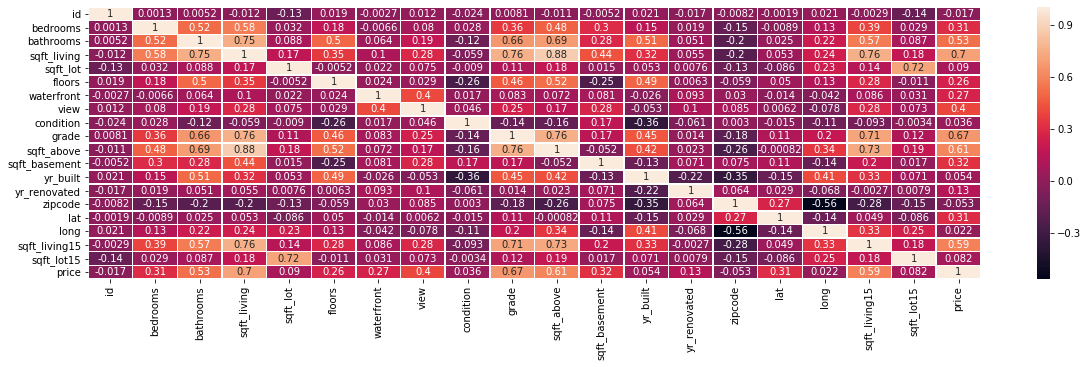

In [10]:
#Creating heatmap between all features
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data.corr(),annot=True,linewidths=.5,ax=ax)
plt.show()

### 5. BASED ON THE CORRELATION BETWEEN FEATURES, WE ARE NOW BIFURCATING THE INDEPENDENT VARIABLES AND PREDICT VARIABLES 

  Further there are few features which are not really necessary in our processs of data cleaning.  So, we can remove those coloumns from our data.

In [11]:
print(data.shape)
data=data.drop(["date","id", 'zipcode','lat', 'long','sqft_lot','condition','yr_built','yr_renovated',
                'sqft_lot15','bedrooms','floors','waterfront','sqft_basement','bathrooms',
                'view','sqft_living15'],axis=1)
print(data.shape)
data.head()

(21613, 21)
(21613, 4)


,sqft_living,grade,sqft_above,price
0,1180,7,1180,221900.0
1,2570,7,2170,538000.0
2,770,6,770,180000.0
3,1960,7,1050,604000.0
4,1680,8,1680,510000.0


In [12]:
data.corr()

,sqft_living,grade,sqft_above,price
sqft_living,1.000000,0.762704,0.876597,0.702035
grade,0.762704,1.000000,0.755923,0.667434
sqft_above,0.876597,0.755923,1.000000,0.605567
price,0.702035,0.667434,0.605567,1.000000


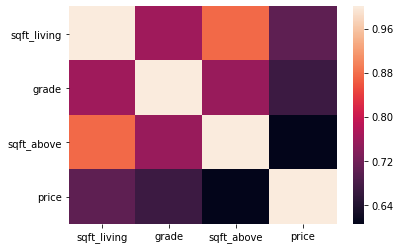

In [13]:
sns.heatmap(data.corr())
plt.show()

### 6. DATA PREPROCESSING

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 4 columns):
sqft_living    21613 non-null int64
grade          21613 non-null int64
sqft_above     21613 non-null int64
price          21613 non-null float64
dtypes: float64(1), int64(3)
memory usage: 675.5 KB



#### By observing the data we found no null values in the data.  So, no need to impute or make any changes with respect to null values.

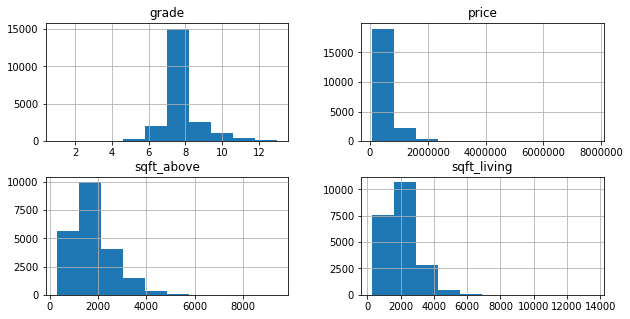

In [15]:
# Plot histograms of each parameter 
data.hist(figsize = (10,5))
plt.show()

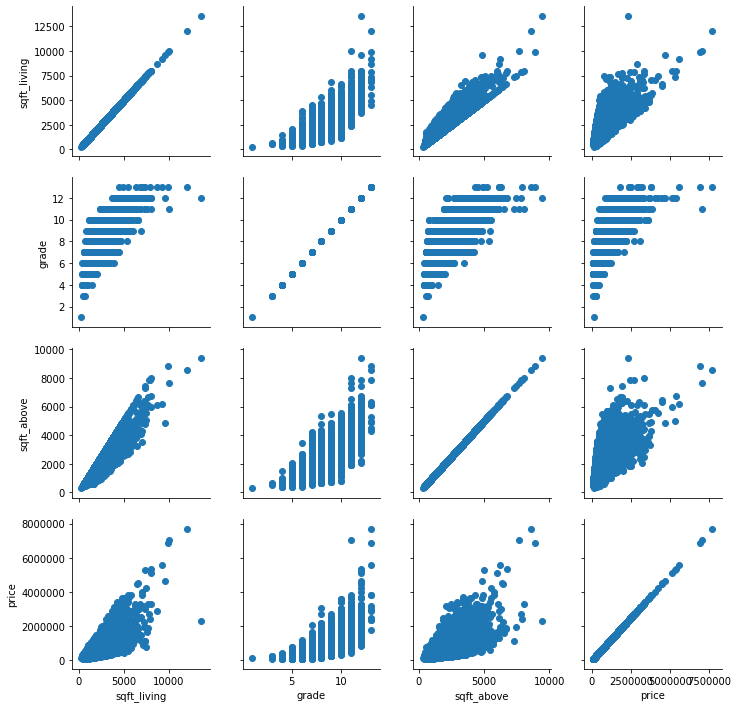

In [16]:
g=sns.PairGrid(data)
g.map(plt.scatter)
plt.show()

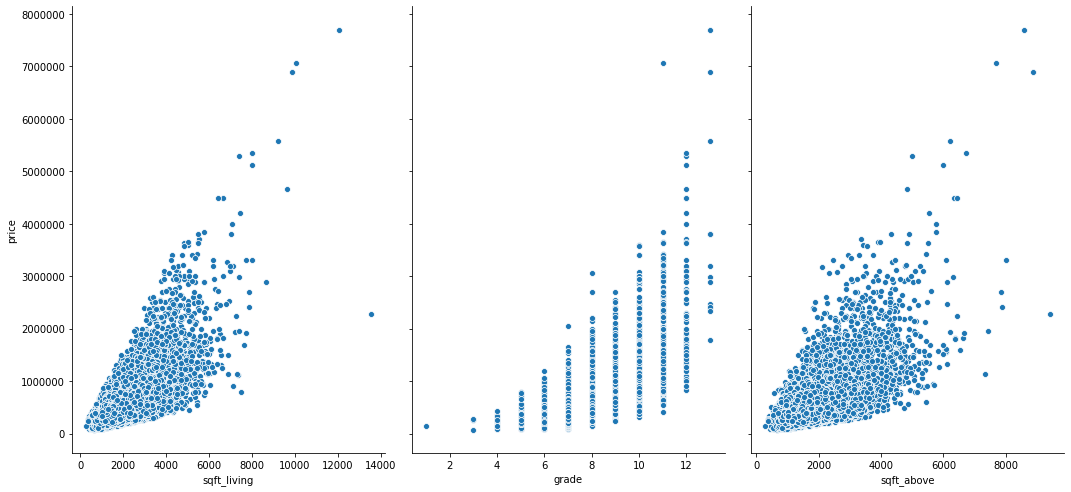

In [17]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['sqft_living','grade','sqft_above'], y_vars='price', height=7, aspect=0.7)

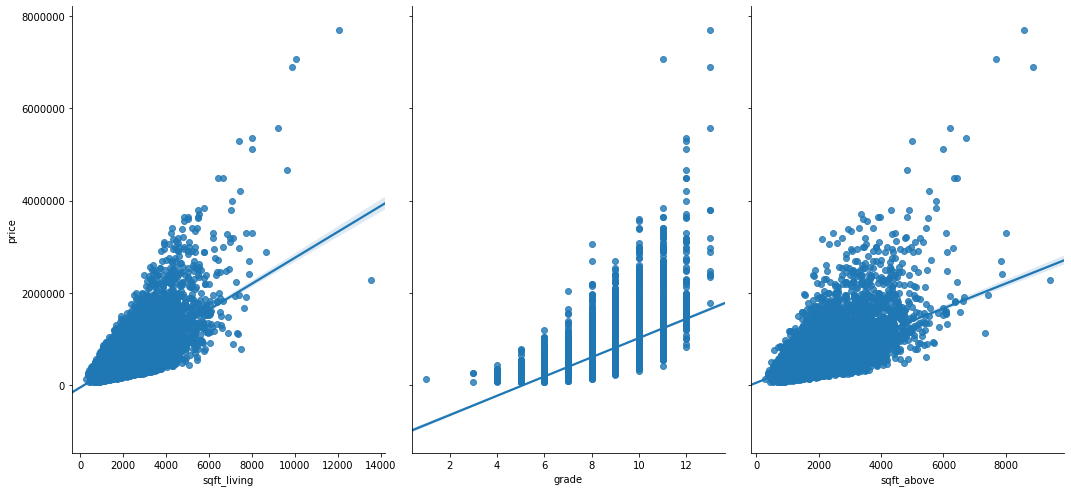

In [18]:
sns.pairplot(data, x_vars=['sqft_living','grade','sqft_above'], y_vars='price', height=7, aspect=0.7, kind='reg')

In [19]:
import statsmodels.formula.api as smf

### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='price ~ sqft_living + grade + sqft_above', data=data).fit()

# print the coefficients
lm1.params

Intercept     -651195.124990
sqft_living       234.679621
grade          109985.519312
sqft_above        -77.707845
dtype: float64

In [20]:
### STATSMODELS ###

# print the confidence intervals for the model coefficients
lm1.conf_int()

,0,1
Intercept,-677745.388696,-624644.861284
sqft_living,226.766575,242.592667
grade,105440.661142,114530.377481
sqft_above,-86.378166,-69.037524


In [21]:
from sklearn.linear_model import LinearRegression
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['sqft_living' , 'grade' , 'sqft_above']
X = data[feature_cols]
y = data.price

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

-651195.1249901467
[ 2.34679621e+02  1.09985519e+05 -7.77078454e+01]


In [22]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm2.coef_))

[('sqft_living', 234.67962071145575),
 ('grade', 109985.51931179618),
 ('sqft_above', -77.70784537825163)]

In [23]:
### STATSMODELS ###

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     8492.
Date:                Wed, 28 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:46:11   Log-Likelihood:            -2.9919e+05
No. Observations:               21613   AIC:                         5.984e+05
Df Residuals:                   21609   BIC:                         5.984e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.512e+05   1.35e+04    -48.074      0.000   -6.78e+05   -6.25e+05
sqft_living   234.6796      4.037     58.131      0.000     226.767     242.593
grade          1.1e+05   2318.718     47.434      0.000    1.05e+05    1.15e+05
sqft_above    -77.7078      4.423    -17.567      0.000     -86.378     -69.038
==============================================================================
Omnibus:                    17130.138   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1066094.455
Skew:                           3.336   Prob(JB):                         0.00
Kurtosis:                      36.754   Cond. No.                     2.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 7. SPLIT TRAIN TEST DATA

In [24]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [25]:
# Splitting the dataset into the Training set and Test set
# --------------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
print(X_train, X_test, y_train, y_test)

[[1570    7 1070]
 [1780    8 1210]
 [1090    8 1090]
 ...
 [2360    9 2360]
 [2370    8 2370]
 [2380    7 1540]] [[1430    7 1430]
 [4670   12 4670]
 [1440    7 1200]
 ...
 [1360    7 1360]
 [ 950    6  950]
 [1640    7 1180]] [495000. 635000. 382500. ... 431000. 411000. 699900.] [ 297000. 1578000.  562100. ...  369950.  300000.  575950.]


In [27]:
X_test

array([[1430,    7, 1430],
       [4670,   12, 4670],
       [1440,    7, 1200],
       ...,
       [1360,    7, 1360],
       [ 950,    6,  950],
       [1640,    7, 1180]], dtype=int64)

### 8. MODEL FITTING

In [28]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

### 9. PREDICTING VALUES

In [30]:
y_pred

array([ 342989.3661665 , 1408937.09334176,  362863.31875967, ...,
        331463.25414864,  157462.48957432,  412503.48544735])

In [31]:
y_test

array([ 297000., 1578000.,  562100., ...,  369950.,  300000.,  575950.])

In [32]:
regressor.predict([[1180,7,1180]])

array([301824.68038842])

### 10.MODEL EVALUATION

In [33]:
#Model Evaluation
from sklearn.metrics import r2_score
RSquare=r2_score(y_test,y_pred)
RSquare

0.5457676537985163

In [34]:
# Predicting a new value
regressor.predict([[1170,7,1170]])

array([300178.0929573])

In [35]:
m=regressor.intercept_
m

-637907.3957720097

In [36]:
c=regressor.coef_
c

array([ 2.40606098e+02,  1.06490680e+05, -7.59473548e+01])

In [37]:
print('Variance score: %.2f' % regressor.score(X_test, y_test))

Variance score: 0.55
